<a href="https://colab.research.google.com/github/lokendrasinha/CRP-Training/blob/main/ML_Pipeline_Kaggle_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload the Kaggle API key (kaggle.json) from your local system.
# This file is required to authenticate and access datasets from Kaggle.

from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lokendrasinha","key":"226048a8bafadc25de04607b3741195f"}'}

In [2]:
# Create a hidden `.kaggle` folder, copy the uploaded `kaggle.json` to it,
# and set secure permissions for safe access by the Kaggle CLI tool.

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Install the official Kaggle Python API tool required to interact with Kaggle from Colab.

!pip install -q kaggle


In [4]:
# Use Kaggle CLI to download a public dataset using its dataset slug.
# In this case, we are using the 'Student Performance' dataset.

!kaggle datasets download -d spscientist/students-performance-in-exams


Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 33.9MB/s]


In [5]:
# Unzip the downloaded Kaggle dataset so we can read the CSV file inside.

!unzip -o students-performance-in-exams.zip


Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [6]:
# Read the CSV dataset using pandas and display the first few rows to explore the data.

import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Encode all categorical (non-numeric) columns using Label Encoding.
# This is necessary because machine learning models require numeric input.

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [8]:
# Select features (independent variables) and the target (dependent variable).
# We predict 'math score' using other columns.

from sklearn.model_selection import train_test_split

X=df.drop("math score",axis=1)
y=df["math score"]
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [9]:
# Normalize (scale) the features using StandardScaler for better model performance.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Train a Linear Regression model using the scaled training data.

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Use the trained model to make predictions and evaluate using metrics like
# Mean Squared Error and R² score to assess model performance.

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))

Mean Squared Error : 28.27528450632738
R2 Score : 0.8838026201112221


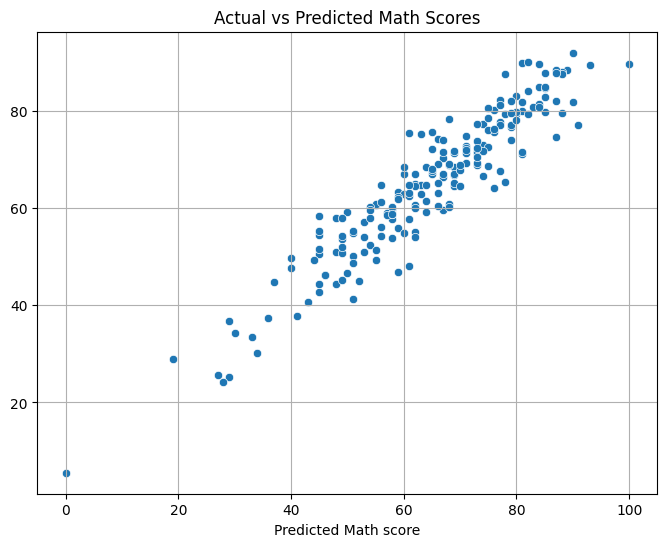

In [12]:
# Visualize the actual vs predicted values using a scatter plot for better interpretation.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Math score")
plt.xlabel("Predicted Math score")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()

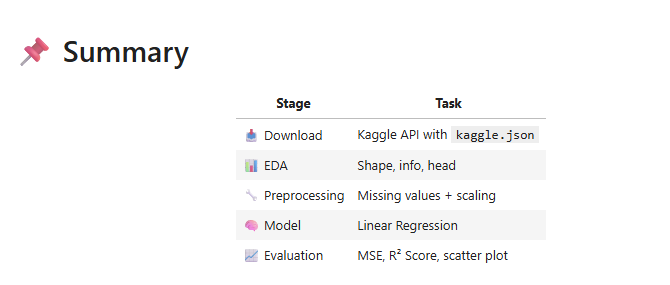